In [1]:
import os

# prints the folder in which your notebook is running
print("Working directory:", os.getcwd())      

# lists all files in that directory
print("Files here:", os.listdir())          


Working directory: C:\Users\asifb\DataEngineering
Files here: ['.ipynb_checkpoints', 'DataEngineeringBajaj.ipynb', 'DataEngineeringQ2.json']


In [7]:
import json
with open('DataEngineeringQ2.json') as f:
    data = json.load(f)
data[0]



{'_id': 'T6hf3rb5',
 'appointmentId': '40d2-9c9f',
 'patientDetails': {'_id': 'T6hb630b3',
  'firstName': 'Css',
  'lastName': '',
  'emailId': '',
  'gender': '',
  'alternateContact': '',
  'birthDate': None},
 'phoneNumber': '96686896670',
 'consultationData': {'adviceTemplates': [],
  'advices': [],
  'attachments': [],
  'chiefComplaints': [],
  'customOne': [],
  'customThree': [],
  'customTwo': [],
  'disease': [],
  'doctorNotes': '',
  'emergencyInstructions': [],
  'emergencyInstructionsTemplate': [],
  'emrTemplates': [],
  'examinationNote': [],
  'findings': [],
  'investigationInstructions': [],
  'investigationTemplates': [],
  'investigations': [],
  'isBalicAppointment': False,
  'isQuickPrescription': False,
  'labTest': [],
  'languageCode': 'en',
  'medicineTemplates': [],
  'medicines': [{'medicineId': '619404',
    'medicineName': 'A',
    'medicineNameStrengthType': '',
    'frequency': '1-0-1',
    'duration': '90',
    'durationIn': 'DAYS',
    'instruction': 

In [9]:
print('Total records:', len(data))

Total records: 31


In [11]:
print('Keys in one record:', data[0].keys())

Keys in one record: dict_keys(['_id', 'appointmentId', 'patientDetails', 'phoneNumber', 'consultationData'])


### CONVERTING TO A DATAFRAME 


In [17]:
import pandas as pd
print(pd.__version__)

2.2.2


In [23]:
import pandas as pd

df= pd.json_normalize(data, sep='.')

print("DataFrame shape:", df.shape)  # (rows, columns)
print("Columns Availabel:", df.columns.tolist())
display(df.head(3))

DataFrame shape: (31, 43)
Columns Availabel: ['_id', 'appointmentId', 'phoneNumber', 'patientDetails._id', 'patientDetails.firstName', 'patientDetails.lastName', 'patientDetails.emailId', 'patientDetails.gender', 'patientDetails.alternateContact', 'patientDetails.birthDate', 'consultationData.adviceTemplates', 'consultationData.advices', 'consultationData.attachments', 'consultationData.chiefComplaints', 'consultationData.customOne', 'consultationData.customThree', 'consultationData.customTwo', 'consultationData.disease', 'consultationData.doctorNotes', 'consultationData.emergencyInstructions', 'consultationData.emergencyInstructionsTemplate', 'consultationData.emrTemplates', 'consultationData.examinationNote', 'consultationData.findings', 'consultationData.investigationInstructions', 'consultationData.investigationTemplates', 'consultationData.investigations', 'consultationData.isBalicAppointment', 'consultationData.isQuickPrescription', 'consultationData.labTest', 'consultationData.l

,_id,appointmentId,phoneNumber,patientDetails._id,patientDetails.firstName,patientDetails.lastName,patientDetails.emailId,patientDetails.gender,patientDetails.alternateContact,patientDetails.birthDate,...,consultationData.procedures,consultationData.prognosis,consultationData.sharePrescription,patientDetails.phrId,patientDetails.chat._id,patientDetails.customId,patientDetails.chat.channelId,consultationData._id,consultationData.updatedAt,consultationData.createdAt
0,T6hf3rb5,40d2-9c9f,96686896670,T6hb630b3,Css,,,,,None,...,[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T65g3rb5,40dbtc9f,9496368916,T6h33b300,Lokesh,,,M,NaN,1996-05-16T18:30:00.000Z,...,[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T7g6Srb5,g3Wt5c9f,7787204833,TjhB4373,Shila,Das,,NaN,NaN,NaN,...,[],[],False,63b5hvy614d5,NaN,NaN,NaN,NaN,NaN,NaN


### Parse and Clean Key Columns

In [25]:
import pandas as pd

# Parse the birthDate column
df['birthDate'] = pd.to_datetime(df['patientDetails.birthDate'], utc=True, errors='coerce')

# See how many parsed successfully
print("Non-null birthDates:", df['birthDate'].notna().sum(), "out of", len(df))

# Peek at the new column
df[['patientDetails.firstName', 'birthDate']].head()


Non-null birthDates: 21 out of 31


,patientDetails.firstName,birthDate
0,Css,NaT
1,Lokesh,1996-05-16 18:30:00+00:00
2,Shila,NaT
3,Bhavika,1988-04-24 14:30:00+00:00
4,Raghu Viju,NaT


### COMPUTE EACH PATIENT’S AGE AS OF APRIL 24, 2025:

In [27]:
import pandas as pd

# 1. Define the reference date (with UTC tz to match birthDate)
ref_date = pd.Timestamp('2025-04-24', tz='UTC')

# 2. Compute age in years (days difference ÷ 365.25)
df['age'] = (ref_date - df['birthDate']).dt.days / 365.25

# 3. Quick check: first few names & ages
df[['patientDetails.firstName', 'birthDate', 'age']].head()

# 4. Calculate the average age (ignoring missing birthDates)
average_age = df['age'].mean()
print(f"Average age: {average_age:.2f} years")


Average age: 35.54 years


### COUNT MEDICINES PER PATIENT

In [29]:
# 1. Create a new column 'med_count' that is the length of each medicines list
df['med_count'] = df['consultationData.medicines'].apply(lambda meds: len(meds))

# 2. Quick check: see the first few patients with their medicine counts
df[['patientDetails.firstName', 'med_count']].head()


,patientDetails.firstName,med_count
0,Css,2
1,Lokesh,2
2,Shila,3
3,Bhavika,1
4,Raghu Viju,2


### PEARSON CORRELATION BETWEEN AGE AND MED_COUNT:The Pearson correlation coefficient (often denoted as r) is a statistic that measures the strength and direction of the linear relationship between two continuous variables.

In [31]:
# Calculate Pearson correlation
correlation = df['age'].corr(df['med_count'])

# Display with two decimal places
print(f"Pearson correlation between age and number of medicines: {correlation:.2f}")


Pearson correlation between age and number of medicines: -0.22


### SCATTER PLOT OF AGE VS. NUMBER OF MEDICINES

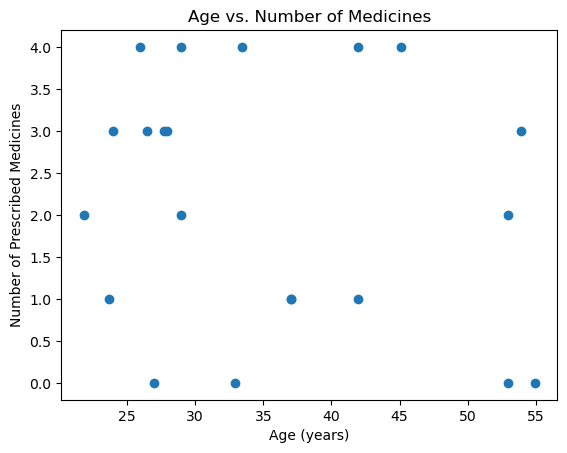

In [42]:
import matplotlib.pyplot as plt

# Scatter plot: age on the x-axis, medicine count on the y-axis
plt.scatter(df['age'], df['med_count'])

# Label the axes
plt.xlabel('Age (years)')
plt.ylabel('Number of Prescribed Medicines')

# Add a title
plt.title('Age vs. Number of Medicines')

# Display the plot
plt.show()


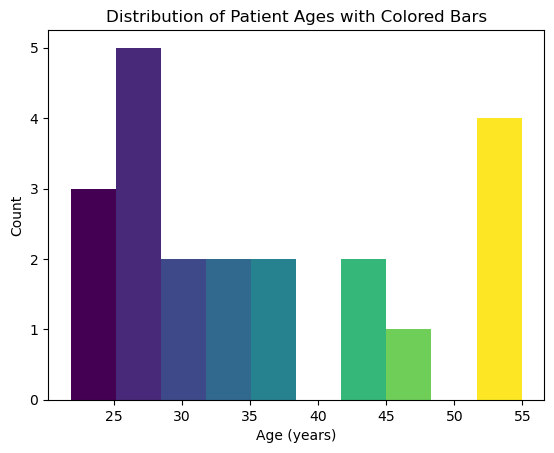

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose you’re making the age histogram again:
ages = df['age'].dropna()

# 1. Create the histogram and capture the bar patches
counts, bins, patches = plt.hist(ages, bins=10)

# 2. Generate a list of colors (one per bar) from a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(patches)))

# 3. Apply each color to the corresponding bar
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# 4. Label and show
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Distribution of Patient Ages with Colored Bars')
plt.show()


### Chekcinh isValidMobile Column

In [50]:
def is_valid_mobile(phone):
    # 1. Convert to string and trim whitespace
    s = str(phone).strip()

    # 2. Strip country‐code prefixes if present
    if s.startswith('+91'):
        s = s[3:]
    elif s.startswith('91'):
        s = s[2:]

    # 3. Check that the remainder is exactly 10 digits
    if not (s.isdigit() and len(s) == 10):
        return False

    # 4. Convert to integer and ensure it’s in the valid range
    n = int(s)
    return 6000000000 <= n <= 9999999999


In [52]:
# Create the new boolean column
df['isValidMobile'] = df['phoneNumber'].apply(is_valid_mobile)

# Peek at the results
df[['phoneNumber', 'isValidMobile']].head(10)


,phoneNumber,isValidMobile
0,96686896670,False
1,9496368916,True
2,7787204833,True
3,9376756879,True
4,5267384241,False
5,+919826374025,True
6,7587265252,True
7,5586958767,False
8,9987602525,True
9,9234354366,True


In [54]:
valid_count = df['isValidMobile'].sum()
print(f"Valid Indian phone numbers: {valid_count} out of {len(df)}")


Valid Indian phone numbers: 18 out of 31
